# Transformation of Features

#### Where Transformation is required?
Algorithms which uses the concept of Gradient Descent (Eg: Linear Regression, Logistic Regression) or Eucledian Distance (Eg: KNN, K Means, Hierarchical Clustering). Because in both the concepts if the feature values are high, takes lot of time to find the Global Minina in Gradient Descent and distance between two points in Eucledian Distance. If the values are low, its easy to calculate the Global Minima and Eucledian Distance and takes less time.

#### Does Transformation required for all ML Algorithms?
No, It doesn't required for all ML algorithms(Eg: Decision Tree, Random Forest, Ensemble Methods). Algorithms like Decision Tree creates its tree based on a values of the features, it is not necessary to transformation the values.

#### Does Deep Learning requires Transformation?
Yes, It does require for all techniques (ANN, CNN, RNN)

# Types of Transformation 
1. Normalization and Standardization
2. Scaling to Minimum and Maximum
3. Scaling to Median and Quantiles
4. Guassian Transformation
     1. Logarithmic Transformation
     2. Reciprocal Transformation
     3. Square Root Transformation
     4. Exponential Transformation
     5. Box Cox Transformation

### Standardization
We try to bring all the variables or features to a similar scale. Standardization means centering the variable at zero. Transforming the variables considering the mean value is Zero

### Formula: 
   z = (x - x_mean) / std

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../CSV Files/titanic_train.csv')

In [3]:
df.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived'],
      dtype='object')

In [4]:
df = pd.read_csv('../CSV Files/titanic_train.csv', usecols=['pclass', 'age', 'fare', 'survived'])
df.head()

,pclass,age,fare,survived
0,3,NaN,7.7333,1
1,3,38.0,8.6625,0
2,3,30.0,24.1500,0
3,2,54.0,23.0000,1
4,2,40.0,13.0000,0


In [5]:
df.dtypes

pclass        int64
age         float64
fare        float64
survived      int64
dtype: object

In [6]:
df.isnull().mean()

pclass      0.000000
age         0.204706
fare        0.001176
survived    0.000000
dtype: float64

In [7]:
df.age.fillna(df.age.median(), inplace=True)

In [8]:
df.fare.value_counts()

13.0000     42
8.0500      40
7.7500      39
7.8958      32
26.0000     29
            ..
247.5208     1
11.1333      1
39.4000      1
7.1417       1
25.7417      1
Name: fare, Length: 236, dtype: int64

In [12]:
df.fare.isnull().sum()

1

In [13]:
df.fare.fillna(13.0000, inplace=True)

In [14]:
df.isnull().sum()

pclass      0
age         0
fare        0
survived    0
dtype: int64

### We use the StandardScaler from sklearn library

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
df_scaled = scaler.fit_transform(df)

In [22]:
df_scaled

array([[ 0.8114201 , -0.09304062, -0.48939339,  1.30983012],
       [ 0.8114201 ,  0.67670089, -0.47207288, -0.76345778],
       [ 0.8114201 ,  0.06090768, -0.18338225, -0.76345778],
       ...,
       [-0.38184475, -0.40093723, -0.14889782,  1.30983012],
       [ 0.8114201 , -2.01739441, -0.37677468, -0.76345778],
       [-0.38184475,  1.75433901, -0.39122086, -0.76345778]])

In [39]:
df_scaled_dataframe = pd.DataFrame(df_scaled)

In [26]:
import matplotlib.pyplot as plt

(array([206.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 166.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 478.]),
 array([-1.5751096 , -1.45578311, -1.33645663, -1.21713014, -1.09780366,
        -0.97847718, -0.85915069, -0.73982421, -0.62049772, -0.50117124,
        -0.38184475, -0.26251827, -0.14319178, -0.0238653 ,  0.09546119,
         0.21478767,  0.33411416,  0.45344064,  0.57276713,  0.69209361,
         0.8114201 ]),
 <BarContainer object of 20 artists>)

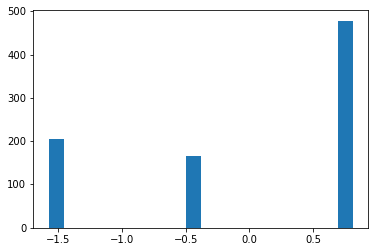

In [30]:
plt.hist(df_scaled[:, 0],bins=20)

In [31]:
df.pclass.nunique()

3

(array([ 35.,  14.,  16.,  27.,  81.,  96., 258.,  86.,  65.,  35.,  23.,
         31.,  28.,  20.,  15.,  12.,   3.,   2.,   2.,   1.]),
 array([-2.23548527, -1.92823024, -1.62097522, -1.31372019, -1.00646517,
        -0.69921014, -0.39195511, -0.08470009,  0.22255494,  0.52980996,
         0.83706499,  1.14432002,  1.45157504,  1.75883007,  2.06608509,
         2.37334012,  2.68059515,  2.98785017,  3.2951052 ,  3.60236022,
         3.90961525]),
 <BarContainer object of 20 artists>)

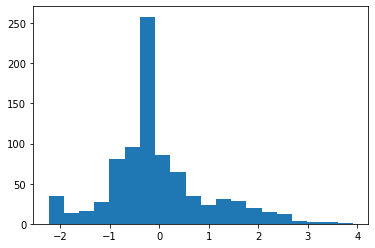

In [32]:
plt.hist(df_scaled[:, 1], bins=20)

In [33]:
df.age.nunique()

88

In [34]:
df.fare.nunique()

236

(array([483., 173.,  32.,  43.,  51.,  11.,   9.,  10.,   8.,   3.,   0.,
          0.,  10.,   4.,   1.,   9.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-6.33543909e-01, -3.15212700e-01,  3.11850899e-03,  3.21449718e-01,
         6.39780927e-01,  9.58112136e-01,  1.27644334e+00,  1.59477455e+00,
         1.91310576e+00,  2.23143697e+00,  2.54976818e+00,  2.86809939e+00,
         3.18643060e+00,  3.50476181e+00,  3.82309302e+00,  4.14142423e+00,
         4.45975543e+00,  4.77808664e+00,  5.09641785e+00,  5.41474906e+00,
         5.73308027e+00,  6.05141148e+00,  6.36974269e+00,  6.68807390e+00,
         7.00640511e+00,  7.32473632e+00,  7.64306752e+00,  7.96139873e+00,
         8.27972994e+00,  8.59806115e+00,  8.91639236e+00]),
 <BarContainer object of 30 artists>)

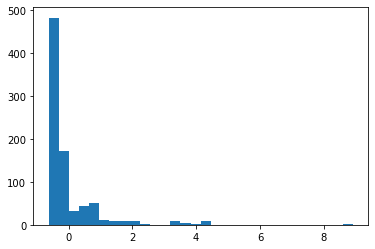

In [57]:
plt.hist(df_scaled[:,2], bins=30)

(array([483., 173.,  32.,  43.,  51.,  11.,   9.,  10.,   8.,   3.,   0.,
          0.,  10.,   4.,   1.,   9.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  17.07764,  34.15528,  51.23292,  68.31056,  85.3882 ,
        102.46584, 119.54348, 136.62112, 153.69876, 170.7764 , 187.85404,
        204.93168, 222.00932, 239.08696, 256.1646 , 273.24224, 290.31988,
        307.39752, 324.47516, 341.5528 , 358.63044, 375.70808, 392.78572,
        409.86336, 426.941  , 444.01864, 461.09628, 478.17392, 495.25156,
        512.3292 ]),
 <BarContainer object of 30 artists>)

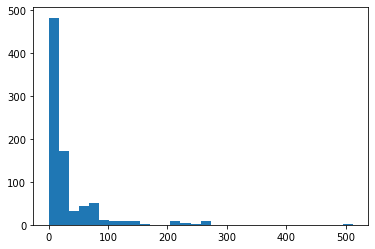

In [48]:
plt.hist(df['fare'], bins=30)

### Min Max Scaling:
1. Works well with CNN in Deep Learning
2. Min Max Scaling scales the values between 0 to 1

### Formula:
X_scaled = X - X.min / (X.max - Xmin)

In [50]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [51]:
df_minmax = pd.DataFrame(min_max.fit_transform(df), columns=df.columns)
df_minmax.head()

,pclass,age,fare,survived
0,1.0,0.348643,0.015094,1.0
1,1.0,0.473904,0.016908,0.0
2,1.0,0.373695,0.047138,0.0
3,0.5,0.674321,0.044893,1.0
4,0.5,0.498956,0.025374,0.0


(array([206.,   0.,   0.,   0.,   0., 166.,   0.,   0.,   0., 478.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

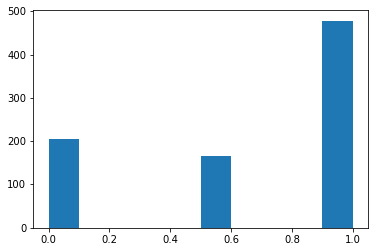

In [52]:
plt.hist(df_minmax['pclass'])

(array([ 35.,  14.,  16.,  27.,  81.,  96., 258.,  86.,  65.,  35.,  23.,
         31.,  28.,  20.,  15.,  12.,   3.,   2.,   2.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

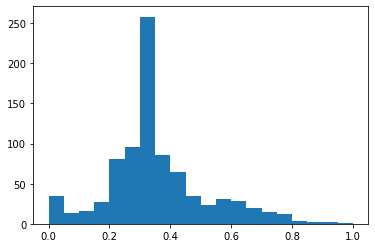

In [53]:
plt.hist(df_minmax['age'], bins=20)

(array([544., 144.,  71.,  34.,  13.,  14.,   3.,   0.,  14.,   1.,   9.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

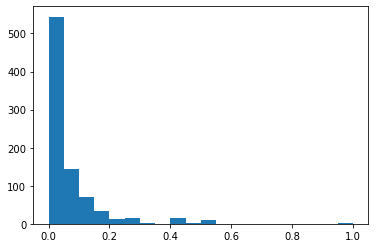

In [54]:
plt.hist(df_minmax['fare'], bins=20)

### Robust Scaler:
1. It is used to scale the features to Median and Quantiles
2. Scaling using median and quantiles consists of subtracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile

IQR = 75th quantile - 25th quantile

X_scaled = (X-X.median) / IQR

In [58]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [59]:
df_robust_scaler = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_robust_scaler.head()

,pclass,age,fare,survived
0,0.0,0.000000,-0.274484,1.0
1,0.0,0.776699,-0.234133,0.0
2,0.0,0.155340,0.438413,0.0
3,-1.0,2.019417,0.388475,1.0
4,-1.0,0.932039,-0.045777,0.0


(array([206.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 166.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 478.]),
 array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
        -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <BarContainer object of 20 artists>)

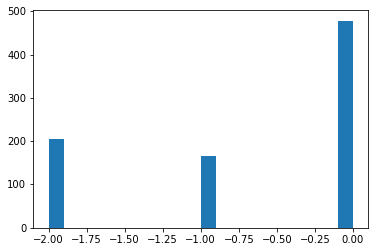

In [60]:
plt.hist(df_robust_scaler['pclass'], bins=20)

(array([ 35.,  14.,  16.,  27.,  81.,  96., 258.,  86.,  65.,  35.,  23.,
         31.,  28.,  20.,  15.,  12.,   3.,   2.,   2.,   1.]),
 array([-2.16180971, -1.85177748, -1.54174524, -1.23171301, -0.92168078,
        -0.61164854, -0.30161631,  0.00841592,  0.31844816,  0.62848039,
         0.93851262,  1.24854485,  1.55857709,  1.86860932,  2.17864155,
         2.48867379,  2.79870602,  3.10873825,  3.41877049,  3.72880272,
         4.03883495]),
 <BarContainer object of 20 artists>)

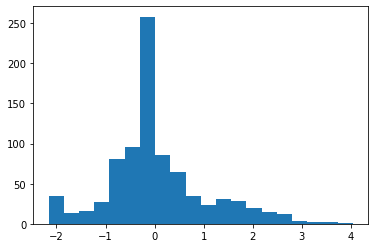

In [61]:
plt.hist(df_robust_scaler['age'], bins=20)

(array([544., 144.,  71.,  34.,  13.,  14.,   3.,   0.,  14.,   1.,   9.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.61030304,  0.50209461,  1.61449226,  2.72688992,  3.83928757,
         4.95168522,  6.06408287,  7.17648052,  8.28887818,  9.40127583,
        10.51367348, 11.62607113, 12.73846879, 13.85086644, 14.96326409,
        16.07566174, 17.1880594 , 18.30045705, 19.4128547 , 20.52525235,
        21.63765001]),
 <BarContainer object of 20 artists>)

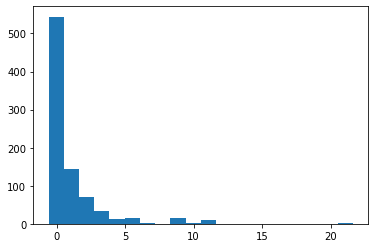

In [62]:
plt.hist(df_robust_scaler['fare'], bins=20)

## Guassian Transformation

Some ML algorithms like linear and logistic regression assume that the features are normally distributed. If the features are normally distributed it will provide good accuracy and performance

      A.Logarithmic Transformation
      B.Reciprocal Transformation
      C.Square Root Transformation
      D.Exponential Transformation
      E.Box Cox Transformation

In [63]:
df = pd.read_csv('../CSV Files/titanic_train.csv', usecols=['age', 'fare', 'survived'])
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [64]:
df.age.fillna(df.age.median(), inplace=True)

In [65]:
df.head()

,age,fare,survived
0,28.0,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [66]:
df.fare.fillna(13.0000, inplace=True)

In [67]:
df.isnull().sum()

age         0
fare        0
survived    0
dtype: int64

### If we want to check whether the feature is Guassian or Normal Distributed, We can go with Q-Q plot

In [69]:
import scipy.stats as stat
import pylab

In [70]:
def plot_data(df, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.show()

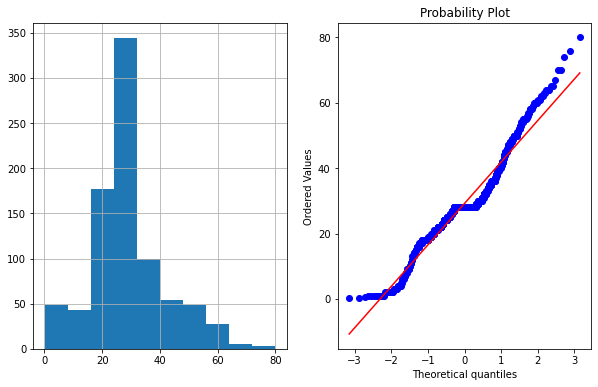

In [71]:
plot_data(df, 'age')

### A. Logarithmic Transformation
1. It Works well with right skewed or left skewed distribution to change it to Normal or Gaussian distribution

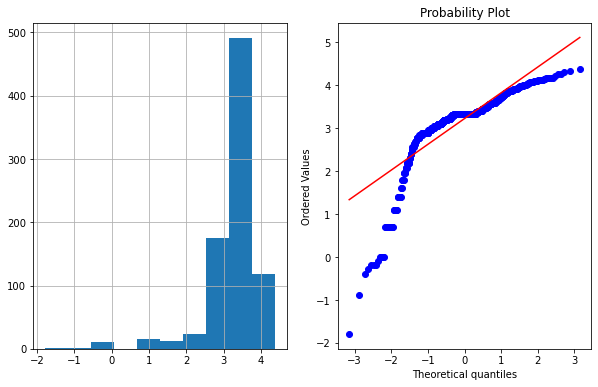

In [72]:
df['age_log'] = np.log(df['age'])
plot_data(df, 'age_log')

### B.Reciprocal Transformation

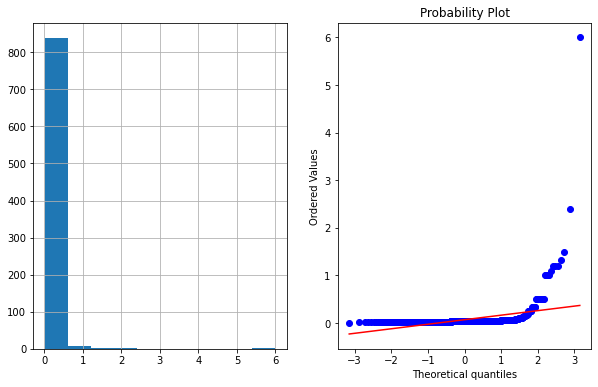

In [75]:
df['age_reciprocal'] = 1/df.age
plot_data(df, 'age_reciprocal')

### C.Square Root Transformation

In [77]:
np.sqrt(4)

2.0

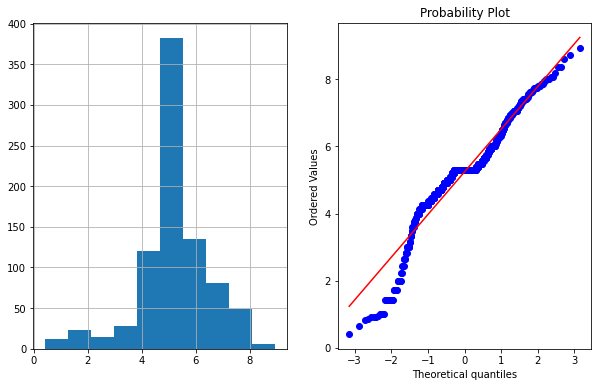

In [79]:
df['age_square'] = np.sqrt(df.age)
plot_data(df, 'age_square')

### D.Exponential Transformation

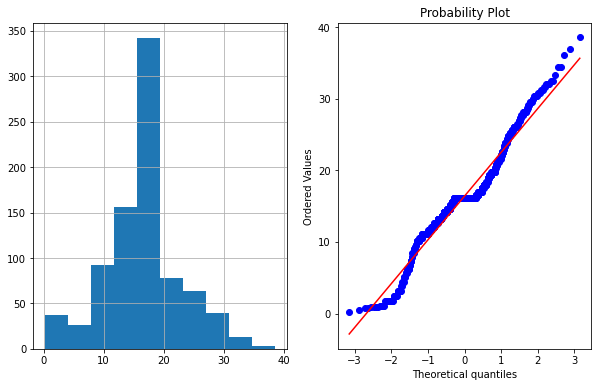

In [84]:
df['age_exponential'] = df.age ** (1/1.2)
plot_data(df, 'age_exponential')

### E. Box Cox Transformation

#### Formula:

T(Y) = (Y exp(λ)-1) / λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected

In [88]:
df['age_boxcox'], parameters = stat.boxcox(df.age)

In [89]:
parameters

0.7706329165332146

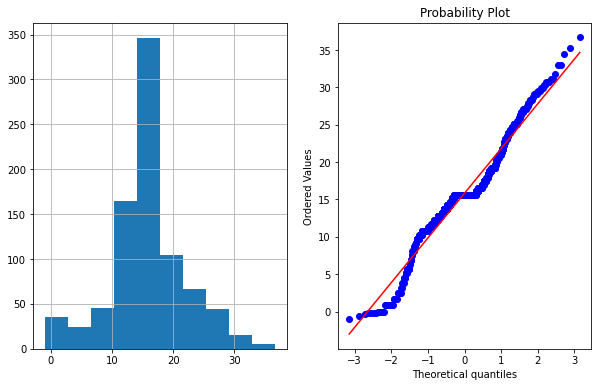

In [90]:
plot_data(df, 'age_boxcox')

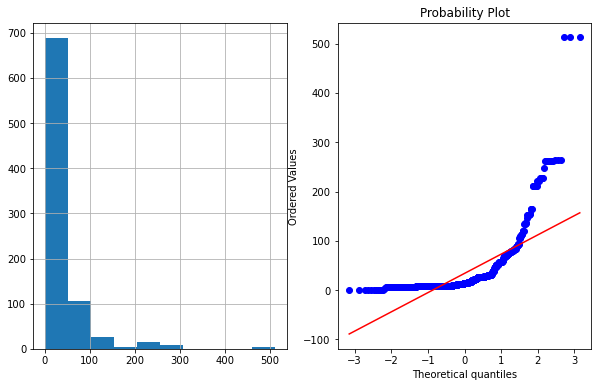

In [92]:
plot_data(df, 'fare')

### Logarithmic Fare_log Plot

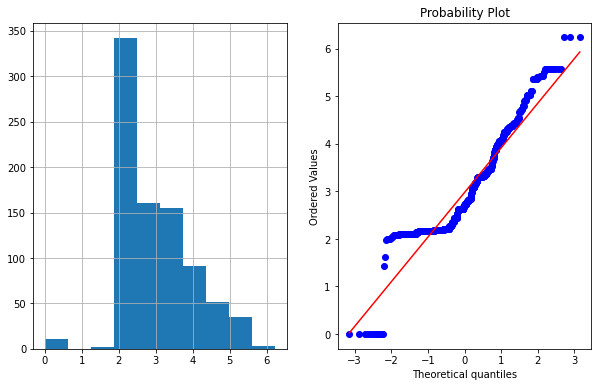

In [91]:
df['fare_log'] = np.log1p(df['fare'])
plot_data(df, 'fare_log')

## Box Cox Plot for Fare Column

In [94]:
df['fare_boxcox'], parameters = stat.boxcox(df.fare + 1)

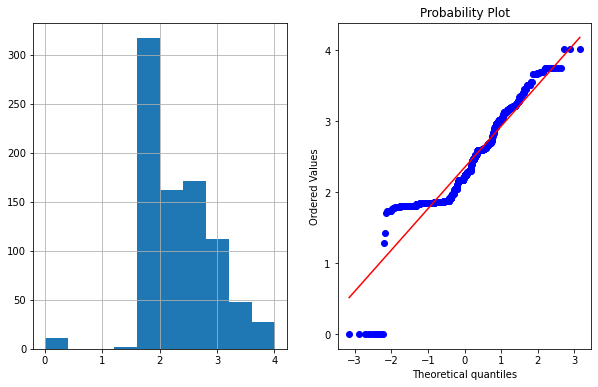

In [95]:
plot_data(df, 'fare_boxcox')